**DS 301: Applied Data Modeling and Predictive Analysis**

**Lecture 6 – Multiclass Classification**

# Multiclass Classifier with MNIST Dataset

Nok Wongpiromsarn, 8 August 2022

**Credit:** The large portion of the code has been taken from Chapter 3 of Aurélien Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow

**Load and process the mnist handwritten digit dataset**

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
x, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

**Train a Support Vector Machine classifier**

SVM is strictly a binary classifier. When using it for a multiclass classification, scikit-learn uses the OvO strategy: it trained 45 binary classifiers, got their decision scores for the image, and selected the class that won the most duels

In [2]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train, y_train) # y_train, not y_train_5

SVC()

some_digit_score: [[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
class with highest score:  5


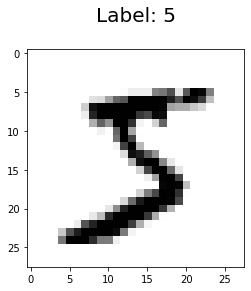

In [3]:
from common_plots import DigitPlotter

some_digit = x[0]
some_digit_label = y[0]
plotter = DigitPlotter((28, 28))
plotter.plot_single(some_digit, some_digit_label)

some_digit_scores_svm = svm_clf.decision_function([some_digit])
print("some_digit_score:", some_digit_scores_svm)
print("class with highest score: ", svm_clf.classes_[np.argmax(some_digit_scores_svm)])

**Train an SGD classifier**

In [4]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [5]:
some_digit_scores_sgd = sgd_clf.decision_function([some_digit])
print("some_digit_score:", some_digit_scores_sgd)
print("class with highest score: ", sgd_clf.classes_[np.argmax(some_digit_scores_sgd)])

some_digit_score: [[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]
class with highest score:  3


**Compute the confusion matrix**

In [6]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[5635    0   61   10   16   50   46    7   66   32]
 [   3 6393   95   21   16   47   15   27  109   16]
 [  72   56 5174   89   69   39  163   66  212   18]
 [  58   32  217 4941   23  441   32   56  216  115]
 [  11   26   46    6 5298   26   73   32   87  237]
 [  68   23   58  150   83 4606  174   26  152   81]
 [  40   13   56    6   22  113 5625    5   36    2]
 [  23   24  103   36  124   40   10 5228   75  602]
 [  40  101  158  122   49  457   77   35 4666  146]
 [  33   18   66   83  515  127    4  485  166 4452]]


**Visualize the confusion matrix**

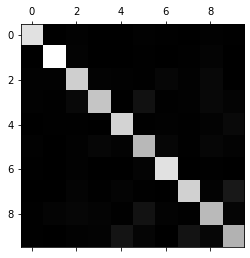

In [7]:
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

**Focus on the error rate**

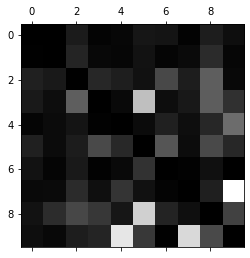

In [8]:
# Compute the error rate on each row
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Fill the diagonal with zeros to keep only the errors, and plot the result
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()